# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# The ARIMA Code

In [2]:
def arima(data, domain, p=4, q=4, n=30):
    """
    Build an ARIMA model with statsmodel and 
    predict future n values.

    Parameters:
        file (str): data file
        p (int): maximum order of autoregressive model
        q (int): maximum order of moving average model
        n (int): number of values to predict

    Return:
        aic (float): aic of optimal model
    """
    
    # Get the first difference of the data.
    Z = data[1:] - data[:-1]
    m = len(Z)
    
    # Find the p and q which give the best AIC.
    best_aic = np.inf
    best_p, best_q = 0, 0
    for i in range(1, p):
        for j in range(1, q):
            arima = ARIMA(Z, order=(i, 0, j), trend = 'c').fit(method = 'innovations_mle')
            if arima.aic < best_aic:
                best_aic = arima.aic
                best_p, best_q = i, j
    
    # Make predictions using the best model.
    arima = ARIMA(Z, order=(best_p, 0, best_q), trend = 'c').fit(method = 'innovations_mle')
    preds = arima.predict(start=0, end=m+n)
    
    # Plot the old and new data and show the plot.
    plt.plot(domain[:m], Z[:m], 'k', label='Old Data')
    plt.plot(domain, preds, 'r', label='ARIMA Model')
    plt.xlabel('Year')
    plt.ylabel('Change in Housing Price')
    plt.title('Statsmodel ARIMA(' + str(best_p) + ',' + str(best_q) + ')')
    plt.legend(loc='best')
    plt.show()
    
    # Return the predictions.
    return preds

# Format the Data

In [3]:
data = pd.read_csv('V3_data_1997.csv', parse_dates=['DATE'])
data.index = data['DATE']
data = data.drop(columns='DATE')
data

,Unemp_Rate,Per_Cap_Pers_Income,Housing_Price_Index,Rental_Vac_Rate,Consumption_HH,SNAP,Med_Income_SL,Population
DATE,,,,,,,,
1997-01-01,3.3,21288,217.92,14.4,37325.7,101750,44118,2065.397
1997-04-01,3.1,21288,219.14,14.4,37325.7,97331,44118,2065.397
1997-07-01,3.1,21288,223.41,14.4,37325.7,93796,44118,2065.397
1997-10-01,3.1,21288,227.32,14.4,37325.7,92254,44118,2065.397
1998-01-01,3.4,22266,229.99,14.6,39429.7,93733,45484,2100.562
...,...,...,...,...,...,...,...,...
2020-01-01,2.4,52204,522.38,5.3,121445.4,163926,79294,3281.684
2020-04-01,10.1,52204,531.90,5.3,121445.4,164234,79294,3281.684
2020-07-01,5.4,52204,544.73,5.3,121445.4,164234,79294,3281.684


# Run an ARIMA Model on the Housing Price Index Alone

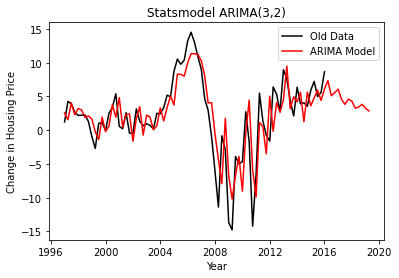

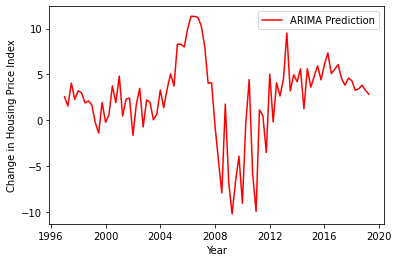

In [11]:
# Run an ARIMA model on some of the data and plot that data and the predictions.
housing = data['Housing_Price_Index']
housing = housing[:-6]  # Remove 2020 from the end of the data.
predictions = arima(housing[:-13].to_numpy(), housing.index[:-1], n=12)
diff = housing.to_numpy()[1:] - housing.to_numpy()[:-1]

# Plot the full dataset and the ARIMA predictions.
plt.plot(housing.index[:-1], diff, 'k', label='True Data')
plt.plot(housing.index[:-1], predictions, 'r', label='ARIMA Prediction')
plt.xlabel('Year')
plt.ylabel('Change in Housing Price Index')
plt.title('ARIMA Prediction From Jan 2016 to Jan 2020')
plt.legend(loc='best')
plt.savefig('arima_housing.png', dpi=600)
plt.show()

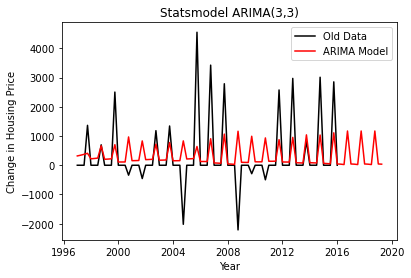

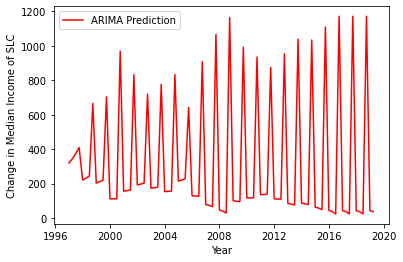

In [10]:
# Run an ARIMA model on some of the data and plot that data and the predictions.
median = data['Med_Income_SL']
median = median[:-6]  # Remove 2020 from the end of the data.
predictions = arima(median[:-13].to_numpy(), median.index[:-1], n=12)
# diff = median.to_numpy()[1:] - median.to_numpy()[:-1]

# Plot the full dataset and the ARIMA predictions.
plt.plot(median.index[:-1], diff, 'k', label='True Data')
plt.plot(median.index[:-1], predictions, 'r', label='ARIMA Prediction')
plt.xlabel('Year')
plt.ylabel('Change in Median Income of SLC')
plt.title('ARIMA Prediction From Jan 2016 to Jan 2020')
plt.legend(loc='best')
plt.savefig('arima_income.png', dpi=600)
plt.show()